<a href="https://colab.research.google.com/github/artvanila/data_projects/blob/main/Employee_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Analysis

## Úvod

*   Lze zjistit, kolik je úrovní řízení ve společnosti? Pokud ano, kolik?
*   Jaká je průměrná mzda aktuálně zaměstnaných seniorních lidí?
*   Jaký byl průměrný věk zaměstnanců společnosti k 31.12.2010?
*   Přes jaký zdroj bylo nahirováno nejvíce zaměstnanců v roce 2011?
*   Popište zajímavý pattern dle vašeho výběru, který v datech naleznete.
*   Zformulujte doporučení pro HR oddělení na základě dat.

## Příprava dat

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# upravit cestu podle umístění datasetu jinak sešit nebude funkční
file_path = '/content/drive/MyDrive/Researches/Ness Digital Engineering/Worksheet in C.xlsx'

In [7]:
df = pd.read_excel(file_path)

In [8]:
def primary_analysis(df):

    display("Information about the dataframe:")
    display(df.info())

    display("\nFirst 5 rows of the dataframe:")
    display(df.head())

    display("\nDescription of numerical columns:")
    display(df.describe())

    display("\nNumber of duplicate entries in the dataset:")
    display(df.duplicated().sum())

    display("\nNumber of missing values in the dataset:")
    display(df.isna().sum())

    display("\nFrequency distributions for categorical columns:")

    for column in df.select_dtypes(include=['object', 'category']).columns:
        display(f"\nColumn '{column}':")
        display(df[column].value_counts())

In [9]:
primary_analysis(df)

'Information about the dataframe:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Surname            307 non-null    object 
 1   Employee_FirstName          307 non-null    object 
 2   EmpID                       307 non-null    int64  
 3   MarriedID                   306 non-null    float64
 4   MaritalStatusID             307 non-null    int64  
 5   GenderID                    307 non-null    int64  
 6   EmpStatusID                 307 non-null    int64  
 7   DeptID                      307 non-null    int64  
 8   PerfScoreID                 307 non-null    int64  
 9   FromDiversityJobFairID      307 non-null    int64  
 10  Salary                      307 non-null    int64  
 11  Termd                       307 non-null    int64  
 12  PositionID                  307 non-null    int64  
 13  Position                    307 non

None

'\nFirst 5 rows of the dataframe:'

,Employee_Surname,Employee_FirstName,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Adinolfi,Wilson K,10026,0.0,0,1,1,5,4,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,Ait Sidi,Karthikeyan,10084,1.0,1,1,5,3,3,0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,Akinkuolie,Sarah,10196,1.0,1,0,5,5,3,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,Alagbe,Trina,10088,1.0,1,0,1,5,3,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,Anderson,Carol,10069,0.0,2,0,5,5,3,0,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


'\nDescription of numerical columns:'

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,307.000000,306.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,299.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,10155.289902,0.398693,0.814332,0.436482,2.381107,4.631922,2.980456,0.094463,68819.511401,0.325733,16.944625,6612.508143,14.682274,4.116417,3.899023,1.185668,0.403909,10.228013
std,89.965229,0.490431,0.946989,0.496759,1.797248,1.062441,0.588236,0.292949,25022.308916,0.469413,6.162839,17011.083885,8.046596,0.786126,0.910846,2.329420,1.275607,5.863936
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10077.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1895.500000,10.000000,3.695000,3.000000,0.000000,0.000000,5.000000
50%,10155.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10232.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,71913.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


'\nNumber of duplicate entries in the dataset:'

np.int64(0)

'\nNumber of missing values in the dataset:'

,0
Employee_Surname,0
Employee_FirstName,0
EmpID,0
MarriedID,1
MaritalStatusID,0
GenderID,0
EmpStatusID,0
DeptID,0
PerfScoreID,0
FromDiversityJobFairID,0


'\nFrequency distributions for categorical columns:'

"\nColumn 'Employee_Surname':"

,count
Employee_Surname,
Smith,5
Gonzalez,3
Robinson,3
Sullivan,2
Miller,2
...,...
Fraval,1
Foster-Baker,1
Foss,1


"\nColumn 'Employee_FirstName':"

,count
Employee_FirstName,
Susan,4
Alex,3
Jason,3
Jennifer,3
Michael,2
...,...
Evelyn,1
Whitney,1
Melisa,1


"\nColumn 'Position':"

,count
Position,
Production Technician I,136
Production Technician II,57
Area Sales Manager,27
Production Manager,14
Software Engineer,10
IT Support,8
Data Analyst,7
Sr. Network Engineer,5
Network Engineer,5


"\nColumn 'State':"

,count
State,
MA,272
CT,6
TX,3
VT,2
VA,1
AL,1
WA,1
CA,1
OH,1


"\nColumn 'DOB':"

,count
DOB,
07/07/84,2
09/22/76,2
09/09/65,2
06/14/87,2
05/01/79,1
...,...
07/06/68,1
08/28/63,1
04/16/79,1


"\nColumn 'Sex':"

,count
Sex,
F,173
M,134


"\nColumn 'MaritalDesc':"

,count
MaritalDesc,
Single,135
Married,122
Divorced,30
Separated,12
Widowed,8


"\nColumn 'CitizenDesc':"

,count
CitizenDesc,
US Citizen,291
Eligible NonCitizen,12
Non-Citizen,4


"\nColumn 'HispanicLatino':"

,count
HispanicLatino,
No,278
Yes,27
no,1
yes,1


"\nColumn 'RaceDesc':"

,count
RaceDesc,
White,185
Black or African American,78
Asian,29
Two or more races,11
American Indian or Alaska Native,3
Hispanic,1


"\nColumn 'DateofHire':"

,count
DateofHire,
1/10/2011,14
3/30/2015,12
1/5/2015,11
9/29/2014,11
7/5/2011,10
...,...
1/9/2006,1
8/1/2011,1
7/5/2015,1


"\nColumn 'DateofTermination':"

,count
DateofTermination,
9/24/2012,2
4/4/2014,2
5/17/2016,2
11/4/2015,2
8/19/2018,2
...,...
5/15/2014,1
5/14/2012,1
6/27/2015,1


"\nColumn 'TermReason':"

,count
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9
hours,8
attendance,7
relocation out of area,5
return to school,5


"\nColumn 'EmploymentStatus':"

,count
EmploymentStatus,
Active,207
Voluntarily Terminated,88
Terminated for Cause,12


"\nColumn 'Department':"

,count
Department,
Production,208
IT/IS,48
Sales,31
Software Engineering,11
Admin Offices,8
Executive Office,1


"\nColumn 'ManagerName':"

,count
ManagerName,
Michael Albert,22
Kissy Sullivan,22
Brannon Miller,22
Kelley Spirea,22
Elijiah Gray,21
David Stanley,21
Webster Butler,21
Ketsia Liebig,21
Amy Dunn,21


"\nColumn 'RecruitmentSource':"

,count
RecruitmentSource,
Indeed,85
LinkedIn,76
Google Search,48
Employee Referral,30
Diversity Job Fair,29
CareerBuilder,23
Website,13
Other,2
On-line Web application,1


"\nColumn 'PerformanceScore':"

,count
PerformanceScore,
Fully Meets,240
Exceeds,37
Needs Improvement,17
PIP,13


"\nColumn 'LastPerformanceReview_Date':"

,count
LastPerformanceReview_Date,
1/14/2019,18
2/18/2019,12
1/21/2019,10
2/25/2019,9
1/28/2019,9
...,...
5/15/2014,1
2/6/2011,1
6/2/2014,1


In [10]:
# Standardizace názvů sloupců s popisem

df.rename(columns={
    'Employee_Surname': 'emp_surname',  # Příjmení zaměstnance
    'Employee_FirstName': 'emp_firstname',  # Křestní jméno zaměstnance
    'EmpID': 'emp_id',  # Unikátní identifikátor zaměstnance
    'MarriedID': 'married_id',  # Indikátor manželského stavu (1 = ženatý/vdaná, 0 = svobodný/á)
    'MaritalStatusID': 'maritalstatus_id',  # ID stavu manželství
    'GenderID': 'gender_id',  # Pohlaví zaměstnance (1 = muž, 0 = žena)
    'EmpStatusID': 'emp_status_id',  # Status zaměstnance (aktivní, neaktivní apod.)
    'DeptID': 'dept_id',  # ID oddělení
    'PerfScoreID': 'perfscore_id',  # ID skóre výkonu zaměstnance
    'FromDiversityJobFairID': 'from_diversity_jobfair_id',  # Indikátor, zda byl zaměstnanec najat přes veletrh diverzity
    'Salary': 'salary',  # Plat zaměstnance
    'Termd': 'termd',  # Indikátor, zda zaměstnanec byl propuštěn (1 = ano, 0 = ne)
    'PositionID': 'position_id',  # ID pozice zaměstnance
    'Position': 'position',  # Název pracovní pozice
    'State': 'state',  # Stát, kde zaměstnanec pracuje
    'Zip': 'zip',  # Poštovní směrovací číslo
    'DOB': 'dob',  # Datum narození zaměstnance
    'Sex': 'sex',  # Pohlaví zaměstnance (textový popis)
    'MaritalDesc': 'marital_desc',  # Popis manželského stavu
    'CitizenDesc': 'citizen_desc',  # Stav občanství zaměstnance
    'HispanicLatino': 'hispanic_latino',  # Indikátor, zda je zaměstnanec Hispánec/Latino (Yes/No)
    'RaceDesc': 'race_desc',  # Popis rasy zaměstnance
    'DateofHire': 'date_hire',  # Datum nástupu do zaměstnání
    'DateofTermination': 'date_termination',  # Datum ukončení zaměstnání
    'TermReason': 'term_reason',  # Důvod ukončení zaměstnání
    'EmploymentStatus': 'employment_status',  # Aktuální stav zaměstnání
    'Department': 'department',  # Oddělení, ve kterém zaměstnanec pracuje
    'ManagerName': 'manager_name',  # Jméno nadřízeného
    'ManagerID': 'manager_id',  # ID nadřízeného
    'RecruitmentSource': 'recruitment_source',  # Zdroj náboru zaměstnance
    'PerformanceScore': 'performance_score',  # Hodnocení výkonu zaměstnance
    'EngagementSurvey': 'engagement_survey',  # Výsledky průzkumu angažovanosti
    'EmpSatisfaction': 'emp_satisfaction',  # Spokojenost zaměstnance
    'SpecialProjectsCount': 'special_projects_count',  # Počet speciálních projektů, na kterých zaměstnanec pracoval
    'LastPerformanceReview_Date': 'last_performance_review_date',  # Datum posledního hodnocení výkonu
    'DaysLateLast30': 'days_late_last_30',  # Počet dní, kdy zaměstnanec přišel pozdě za posledních 30 dní
    'Absences': 'absences'  # Počet absencí zaměstnance
}, inplace=True)


In [11]:
# Oprava datových typů

df["gender_id"] = df["gender_id"].astype(bool)
df["termd"] = df["termd"].astype(bool)

df['dob'] = pd.to_datetime(df['dob'], format='%m/%d/%y', errors='coerce')
df.loc[df['dob'] > pd.to_datetime('2025-01-01'), 'dob'] -= pd.DateOffset(years=100)
df['date_hire'] = pd.to_datetime(df['date_hire'], format='%m/%d/%Y', errors='coerce')
df['date_termination'] = pd.to_datetime(df['date_termination'], format='%m/%d/%Y', errors='coerce')
df['last_performance_review_date'] = pd.to_datetime(df['last_performance_review_date'], format='%m/%d/%Y', errors='coerce')

df["zip"] = df["zip"].astype(str)
df["maritalstatus_id"] = df["maritalstatus_id"].astype(str)
df["emp_status_id"] = df["emp_status_id"].astype(str)
df["dept_id"] = df["dept_id"].astype(str)
df["perfscore_id"] = df["perfscore_id"].astype(str)
df["from_diversity_jobfair_id"] = df["from_diversity_jobfair_id"].astype(str)
df["emp_id"] = df["emp_id"].astype(str)
df["position_id"] = df["position_id"].astype(str)

In [12]:
# Analýza kvantitativních dat - základní statistika platů

salary_stats = df["salary"].describe()
print("Salary Statistics:\n", salary_stats)

Salary Statistics:
 count       307.000000
mean      68819.511401
std       25022.308916
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       71913.000000
max      250000.000000
Name: salary, dtype: float64


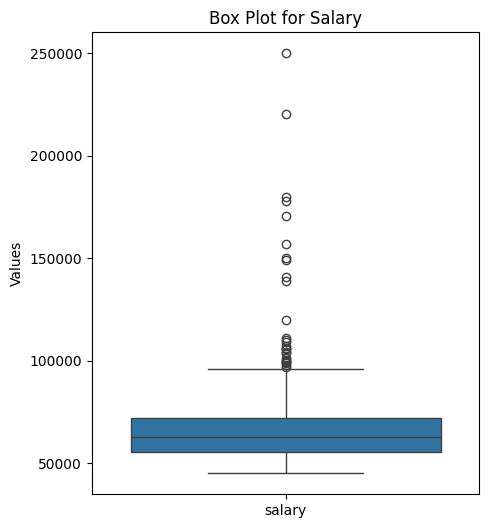

In [13]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df[['salary']])
plt.title('Box Plot for Salary')
plt.ylabel('Values')
plt.show()

In [14]:
# Oprava chybějících hodnot

df.loc[:, "married_id"] = df["married_id"].fillna(1).astype(int)
df.loc[df["emp_firstname"] == "Linda", "married_id"] = 0
df["married_id"] = df["married_id"].astype(bool)
df.loc[:, "date_termination"] = df["date_termination"].replace("N/A-StillEmployed", pd.NaT)
df.loc[:, "manager_id"] = df["manager_id"].fillna(8)
df.loc[df["manager_name"] == "Webster Butler", "manager_id"] = 39
df["manager_id"] = df["manager_id"].astype(int)
df["manager_id"] = df["manager_id"].astype(str)

In [15]:
# Detekce a oprava duplicitních hodnot

df.loc[:, "citizen_desc"] = df["citizen_desc"].replace({
    "Eligible NonCitizen": "Non-Citizen"
})
df.loc[:, "hispanic_latino"] = df["hispanic_latino"].replace({
    "no": "No", "yes": "Yes"
})
df["hispanic_latino"] = df["hispanic_latino"].astype(bool)

In [16]:
primary_analysis(df)

'Information about the dataframe:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   emp_surname                   307 non-null    object        
 1   emp_firstname                 307 non-null    object        
 2   emp_id                        307 non-null    object        
 3   married_id                    307 non-null    bool          
 4   maritalstatus_id              307 non-null    object        
 5   gender_id                     307 non-null    bool          
 6   emp_status_id                 307 non-null    object        
 7   dept_id                       307 non-null    object        
 8   perfscore_id                  307 non-null    object        
 9   from_diversity_jobfair_id     307 non-null    object        
 10  salary                        307 non-null    int64         
 11  termd                         30

None

'\nFirst 5 rows of the dataframe:'

,emp_surname,emp_firstname,emp_id,married_id,maritalstatus_id,gender_id,emp_status_id,dept_id,perfscore_id,from_diversity_jobfair_id,...,manager_name,manager_id,recruitment_source,performance_score,engagement_survey,emp_satisfaction,special_projects_count,last_performance_review_date,days_late_last_30,absences
0,Adinolfi,Wilson K,10026,False,0,True,1,5,4,0,...,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,Ait Sidi,Karthikeyan,10084,True,1,True,5,3,3,0,...,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,Akinkuolie,Sarah,10196,True,1,False,5,5,3,0,...,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,Alagbe,Trina,10088,True,1,False,1,5,3,0,...,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,Anderson,Carol,10069,False,2,False,5,5,3,0,...,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


'\nDescription of numerical columns:'

,salary,dob,date_hire,date_termination,engagement_survey,emp_satisfaction,special_projects_count,last_performance_review_date,days_late_last_30,absences
count,307.000000,307,307,100,307.000000,307.000000,307.000000,307,307.000000,307.000000
mean,68819.511401,1979-01-17 02:44:10.162866464,2013-01-26 11:15:26.384364800,2015-05-30 23:02:24,4.116417,3.899023,1.185668,2017-09-18 08:26:34.788273664,0.403909,10.228013
min,45046.000000,1951-01-02 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000
25%,55501.500000,1973-12-03 00:00:00,2011-07-11 00:00:00,2013-12-13 12:00:00,3.695000,3.000000,0.000000,2016-04-03 12:00:00,0.000000,5.000000
50%,62810.000000,1980-08-26 00:00:00,2013-01-07 00:00:00,2015-09-22 00:00:00,4.280000,4.000000,0.000000,2019-01-16 00:00:00,0.000000,10.000000
75%,71913.000000,1986-05-10 12:00:00,2014-08-18 00:00:00,2016-09-05 06:00:00,4.700000,5.000000,0.000000,2019-02-04 00:00:00,0.000000,15.000000
max,250000.000000,1992-08-17 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000
std,25022.308916,NaN,NaN,NaN,0.786126,0.910846,2.329420,NaN,1.275607,5.863936


'\nNumber of duplicate entries in the dataset:'

np.int64(0)

'\nNumber of missing values in the dataset:'

,0
emp_surname,0
emp_firstname,0
emp_id,0
married_id,0
maritalstatus_id,0
gender_id,0
emp_status_id,0
dept_id,0
perfscore_id,0
from_diversity_jobfair_id,0


'\nFrequency distributions for categorical columns:'

"\nColumn 'emp_surname':"

,count
emp_surname,
Smith,5
Gonzalez,3
Robinson,3
Sullivan,2
Miller,2
...,...
Fraval,1
Foster-Baker,1
Foss,1


"\nColumn 'emp_firstname':"

,count
emp_firstname,
Susan,4
Alex,3
Jason,3
Jennifer,3
Michael,2
...,...
Evelyn,1
Whitney,1
Melisa,1


"\nColumn 'emp_id':"

,count
emp_id,
10271,1
10026,1
10084,1
10183,1
10022,1
...,...
10062,1
10194,1
10002,1


"\nColumn 'maritalstatus_id':"

,count
maritalstatus_id,
0,135
1,122
2,30
3,12
4,8


"\nColumn 'emp_status_id':"

,count
emp_status_id,
1,183
5,88
3,14
4,11
2,11


"\nColumn 'dept_id':"

,count
dept_id,
5,207
3,48
6,32
4,10
1,9
2,1


"\nColumn 'perfscore_id':"

,count
perfscore_id,
3,240
4,37
2,17
1,13


"\nColumn 'from_diversity_jobfair_id':"

,count
from_diversity_jobfair_id,
0,278
1,29


"\nColumn 'position_id':"

,count
position_id,
19,136
20,57
3,27
18,13
24,9
14,8
9,8
28,5
15,5


"\nColumn 'position':"

,count
position,
Production Technician I,136
Production Technician II,57
Area Sales Manager,27
Production Manager,14
Software Engineer,10
IT Support,8
Data Analyst,7
Sr. Network Engineer,5
Network Engineer,5


"\nColumn 'state':"

,count
state,
MA,272
CT,6
TX,3
VT,2
VA,1
AL,1
WA,1
CA,1
OH,1


"\nColumn 'zip':"

,count
zip,
1886,13
1810,7
2176,7
2451,7
2045,7
...,...
2124,1
2459,1
1876,1


"\nColumn 'sex':"

,count
sex,
F,173
M,134


"\nColumn 'marital_desc':"

,count
marital_desc,
Single,135
Married,122
Divorced,30
Separated,12
Widowed,8


"\nColumn 'citizen_desc':"

,count
citizen_desc,
US Citizen,291
Non-Citizen,16


"\nColumn 'race_desc':"

,count
race_desc,
White,185
Black or African American,78
Asian,29
Two or more races,11
American Indian or Alaska Native,3
Hispanic,1


"\nColumn 'term_reason':"

,count
term_reason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9
hours,8
attendance,7
relocation out of area,5
return to school,5


"\nColumn 'employment_status':"

,count
employment_status,
Active,207
Voluntarily Terminated,88
Terminated for Cause,12


"\nColumn 'department':"

,count
department,
Production,208
IT/IS,48
Sales,31
Software Engineering,11
Admin Offices,8
Executive Office,1


"\nColumn 'manager_name':"

,count
manager_name,
Michael Albert,22
Kissy Sullivan,22
Brannon Miller,22
Kelley Spirea,22
Elijiah Gray,21
David Stanley,21
Webster Butler,21
Ketsia Liebig,21
Amy Dunn,21


"\nColumn 'manager_id':"

,count
manager_id,
20,22
18,22
12,22
11,21
39,21
22,21
16,21
14,21
19,21


"\nColumn 'recruitment_source':"

,count
recruitment_source,
Indeed,85
LinkedIn,76
Google Search,48
Employee Referral,30
Diversity Job Fair,29
CareerBuilder,23
Website,13
Other,2
On-line Web application,1


"\nColumn 'performance_score':"

,count
performance_score,
Fully Meets,240
Exceeds,37
Needs Improvement,17
PIP,13


## EDA

Lze zjistit, kolik je úrovní řízení ve společnosti? Pokud ano, kolik?

In [17]:
# Funkce pro přiřazení úrovně řízení

def get_management_level(position):
    if 'Sr. Accountant' in position or 'President & CEO' in position:
        return 1
    elif 'CIO' in position or 'Production Manager' in position or 'Director of Operations' in position or 'Director of Sales' in position or 'Shared Services Manager' in position:
        return 2
    elif 'Production Technician I' in position or 'Production Technician II' in position or 'Sales Manager' in position or 'Accountant I' in position or 'Accountant II' in position or 'Administrative Assistant' in position or 'IT Manager - DB' in position or 'IT Manager - Infra' in position or 'IT Director' in position or 'IT Manager - Support' in position or 'BI Director' in position or 'Software Engineering Manager' in position:
        return 3
    elif 'Data Analyst' in position or 'Principal Data Architect' in position or 'Database Administrator' in position or 'Sr. DBA' in position or 'Enterprise Architect' in position or 'Area Sales Manager' in position or 'Sr. Network Engineer' in position or 'Network Engineer' in position or 'IT Support' in position or 'Software Engineer' in position or 'BI Developer' in position or 'Senior BI Developer' in position or 'Data Architect' in position or 'IT Support' in position:
        return 4
    else:
        return None

# Přidání sloupce 'management_level'

df['management_level'] = df['position'].apply(get_management_level)
df.head()


,emp_surname,emp_firstname,emp_id,married_id,maritalstatus_id,gender_id,emp_status_id,dept_id,perfscore_id,from_diversity_jobfair_id,...,manager_id,recruitment_source,performance_score,engagement_survey,emp_satisfaction,special_projects_count,last_performance_review_date,days_late_last_30,absences,management_level
0,Adinolfi,Wilson K,10026,False,0,True,1,5,4,0,...,22,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,3
1,Ait Sidi,Karthikeyan,10084,True,1,True,5,3,3,0,...,4,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,4
2,Akinkuolie,Sarah,10196,True,1,False,5,5,3,0,...,20,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,3
3,Alagbe,Trina,10088,True,1,False,1,5,3,0,...,16,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,3
4,Anderson,Carol,10069,False,2,False,5,5,3,0,...,39,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,3


A taky doplníme sloupec, který označí, zda je osoba manažerem (má podřízené), či nikoliv.

In [18]:
df['emp_fullname'] = df['emp_firstname'].str.strip() + ' ' + df['emp_surname'].str.strip()
df['manager_name'] = df['manager_name'].str.strip()
manager_names = df['manager_name'].unique()
def is_manager(row, all_names):
    if row['emp_surname'] == 'LeBlanc':
       return 1
    return 1 if row['emp_fullname'] in all_names else 0
df['is_manager'] = df.apply(lambda row: is_manager(row, manager_names), axis=1)
df_fil = df[df['is_manager'] == 1]
display(df_fil)

,emp_surname,emp_firstname,emp_id,married_id,maritalstatus_id,gender_id,emp_status_id,dept_id,perfscore_id,from_diversity_jobfair_id,...,performance_score,engagement_survey,emp_satisfaction,special_projects_count,last_performance_review_date,days_late_last_30,absences,management_level,emp_fullname,is_manager
42,Champaigne,Brian,10108,True,1,True,1,3,3,0,...,Fully Meets,4.50,5,7,2019-01-15,0,8,3,Brian Champaigne,1
60,Daneault,Lynn,10099,False,0,False,1,6,3,0,...,Fully Meets,4.62,4,0,2019-01-24,0,8,3,Lynn Daneault,1
76,Dougall,Eric,10028,False,0,True,1,3,4,0,...,Exceeds,4.30,5,5,2019-01-04,0,4,3,Eric Dougall,1
78,Dunn,Amy,10105,False,0,False,1,5,3,0,...,Fully Meets,4.52,4,0,2019-01-15,0,4,2,Amy Dunn,1
116,Gray,Elijiah,10098,False,2,True,1,5,3,0,...,Fully Meets,4.63,3,0,2019-01-04,0,2,2,Elijiah Gray,1
129,Houlihan,Debra,10272,True,1,False,1,6,3,0,...,Fully Meets,4.50,4,0,2019-01-21,0,19,2,Debra Houlihan,1
147,King,Janet,10089,True,1,False,1,2,3,0,...,Fully Meets,4.83,3,0,2019-01-17,0,10,1,Janet King,1
161,LeBlanc,Brandon R,10134,True,1,True,1,1,3,0,...,Fully Meets,4.10,4,0,2019-01-28,0,20,2,Brandon R LeBlanc,1
164,Liebig,Ketsia,10017,True,1,False,1,5,4,0,...,Exceeds,4.10,3,0,2019-01-21,0,11,2,Ketsia Liebig,1
184,Miller,Brannon,10116,False,0,True,1,5,3,0,...,Fully Meets,4.37,3,0,2019-01-14,0,2,2,Brannon Miller,1


Jaká je průměrná mzda aktuálně zaměstnaných seniorních lidí?

In [19]:
active_senior_df = df[
    (df['employment_status'] == 'Active') &
    ((df['is_manager'] == 1) |
     df['position'].str.contains('Senior|Sr.|Principal|St.', case=False, na=False)) &
    ~df['position'].isin(['Administrative Assistant', 'Database Administrator'])
]
active_senior_df[['position', 'management_level', 'is_manager']].head(50)

,position,management_level,is_manager
26,Sr. Accountant,1,0
39,Sr. DBA,4,0
42,BI Director,3,1
59,Sr. Network Engineer,4,0
60,Sales Manager,3,1
61,Sr. Network Engineer,4,0
76,IT Manager - Support,3,1
78,Production Manager,2,1
96,Sr. Accountant,1,0
116,Production Manager,2,1


In [20]:
avg_salary_by_level = active_senior_df.groupby('management_level')['salary'].mean().reset_index()
avg_salary_by_level

,management_level,salary
0,1,151906.000000
1,2,102513.222222
2,3,114409.666667
3,4,91088.111111


<ipython-input-21-4ee63db123f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='management_level', y='salary', data=avg_salary_by_level, palette='viridis')


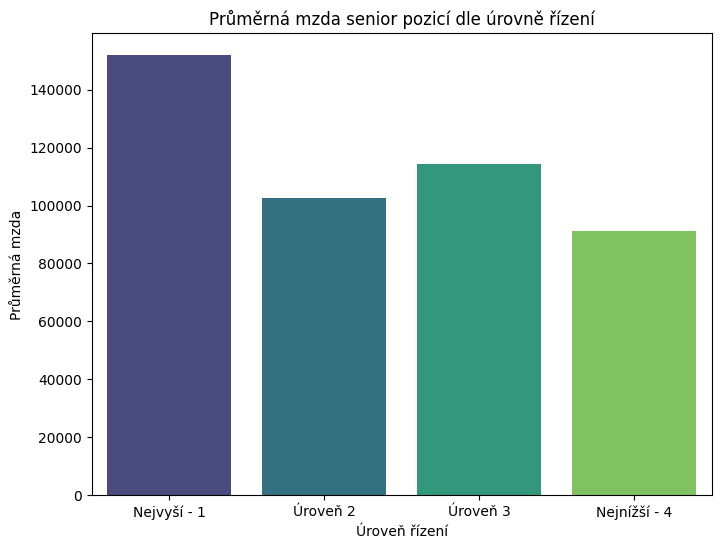

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='management_level', y='salary', data=avg_salary_by_level, palette='viridis')
plt.title('Průměrná mzda senior pozicí dle úrovně řízení')
plt.xlabel('Úroveň řízení')
plt.ylabel('Průměrná mzda')
plt.xticks([0, 1, 2, 3], ['Nejvyší - 1', 'Úroveň 2', 'Úroveň 3', 'Nejnížší - 4'])
plt.show()

Jaký byl průměrný věk zaměstnanců společnosti k 31.12.2010?

In [22]:
reference_date = pd.to_datetime('2010-12-31')

active_employees = df[
    (df['date_hire'] < reference_date) &
    ((df['date_termination'].isna()) | (df['date_termination'] > reference_date))
].copy()

active_employees['age'] = (reference_date - active_employees['dob']).dt.days // 365

average_age = active_employees['age'].mean()

display(f"Průměrný věk zaměstnanců k {reference_date.date()} byl {average_age:.2f} let.")

'Průměrný věk zaměstnanců k 2010-12-31 byl 31.86 let.'

Přes jaký zdroj bylo nahirováno nejvíce zaměstnanců v roce 2011

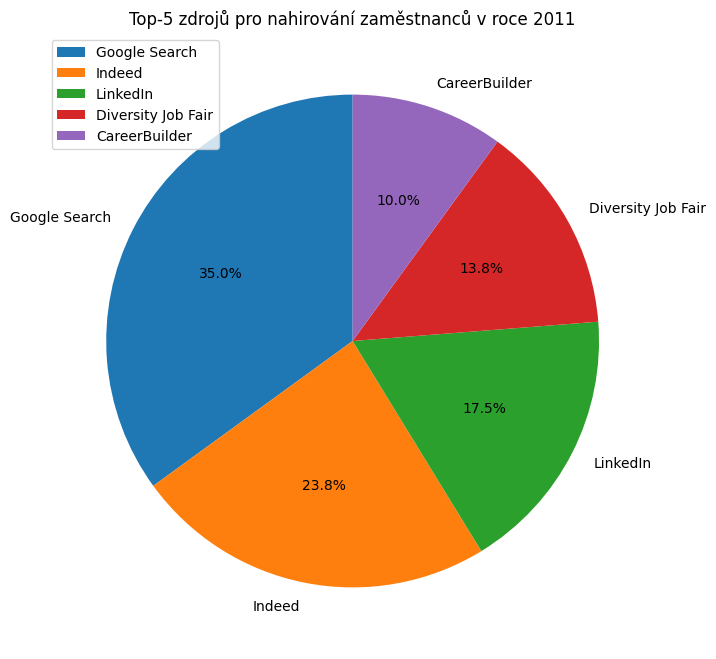

In [23]:
df_2011 = df[df['date_hire'].dt.year == 2011]
source_counts = df_2011['recruitment_source'].value_counts()
top_5_sources = source_counts.head(5)
plt.figure(figsize=(8, 8))
top_5_sources.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Top-5 zdrojů pro nahirování zaměstnanců v roce 2011')
plt.ylabel('')
plt.show()

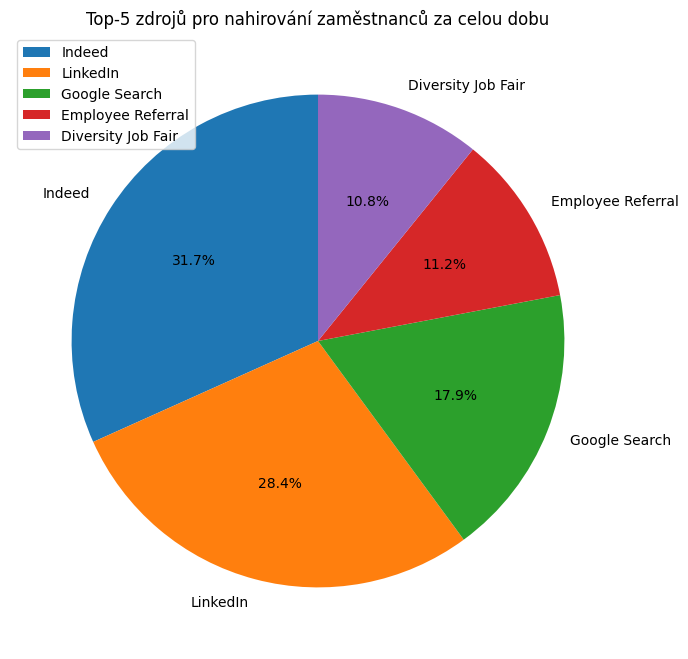

In [24]:
df['date_hire'] = pd.to_datetime(df['date_hire'], errors='coerce')
recruitment_sources = df['recruitment_source'].value_counts().head(5)
plt.figure(figsize=(8, 8))
recruitment_sources.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Top-5 zdrojů pro nahirování zaměstnanců za celou dobu')
plt.ylabel('')
plt.show()

In [25]:
df['is_referred'] = df['recruitment_source'].apply(lambda x: 'Employee Referral' if x == 'Employee Referral' else 'Others')

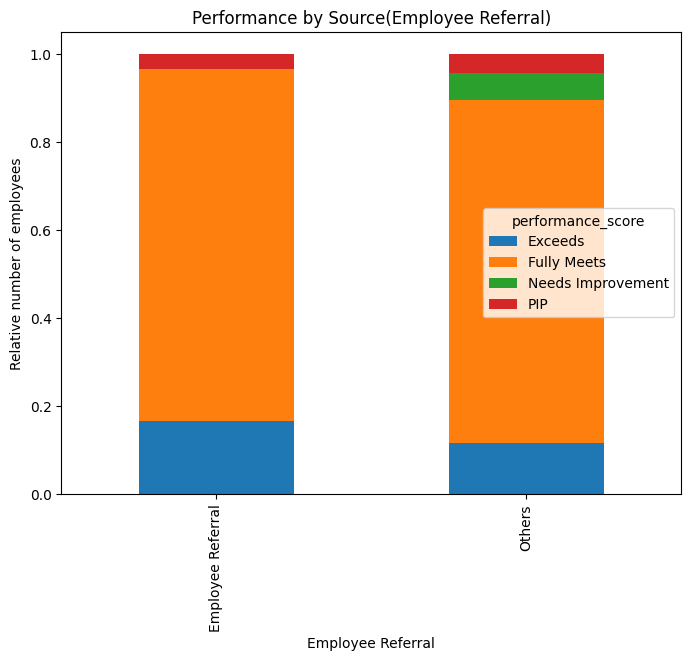

In [26]:
referred_performance = df.groupby('is_referred')['performance_score'].value_counts(normalize=True).unstack().fillna(0)
referred_performance.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Performance by Source(Employee Referral)')
plt.xlabel('Employee Referral')
plt.ylabel('Relative number of employees')
plt.show()

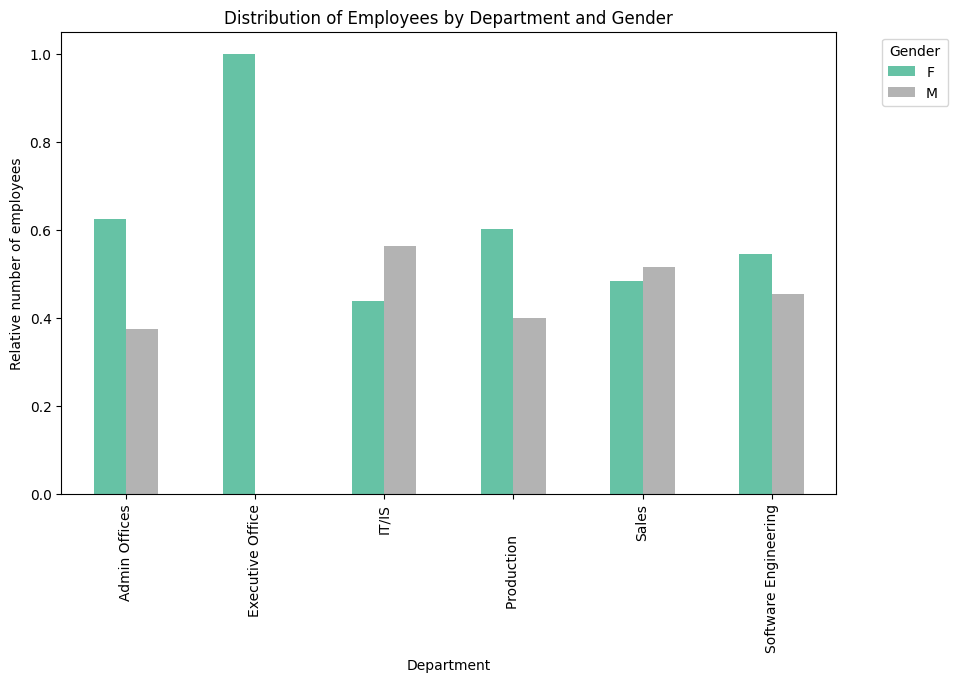

In [27]:
gender_department = df.groupby('department')['sex'].value_counts(normalize=True).unstack().fillna(0)
gender_department.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Distribution of Employees by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Relative number of employees')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

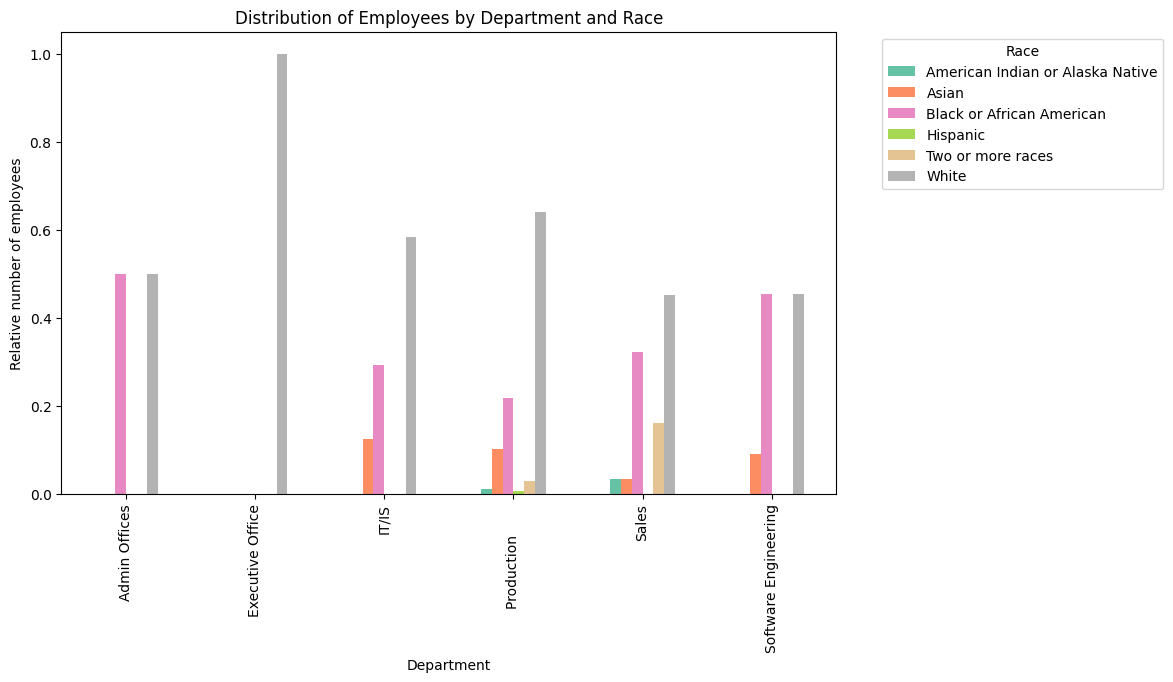

In [28]:
race_department = df.groupby('department')['race_desc'].value_counts(normalize=True).unstack().fillna(0)
race_department.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Distribution of Employees by Department and Race')
plt.xlabel('Department')
plt.ylabel('Relative number of employees')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

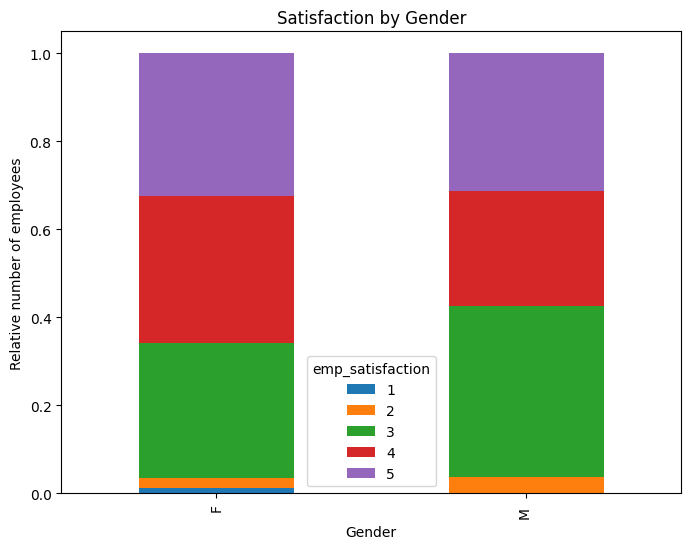

In [29]:
gender_satisfaction = df.groupby('sex')['emp_satisfaction'].value_counts(normalize=True).unstack().fillna(0)
gender_satisfaction.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Relative number of employees')
plt.show()

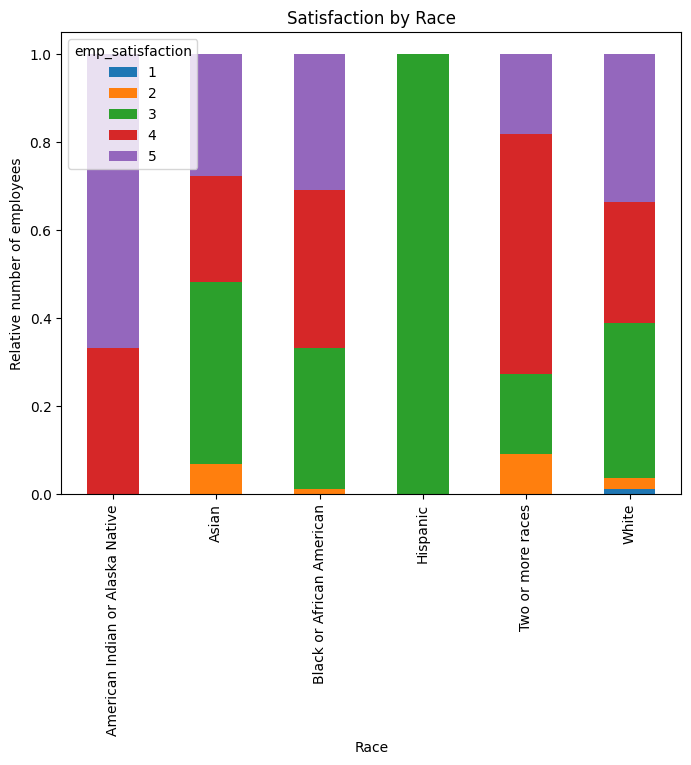

In [30]:
race_satisfaction = df.groupby('race_desc')['emp_satisfaction'].value_counts(normalize=True).unstack().fillna(0)
race_satisfaction.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Satisfaction by Race')
plt.xlabel('Race')
plt.ylabel('Relative number of employees')
plt.show()

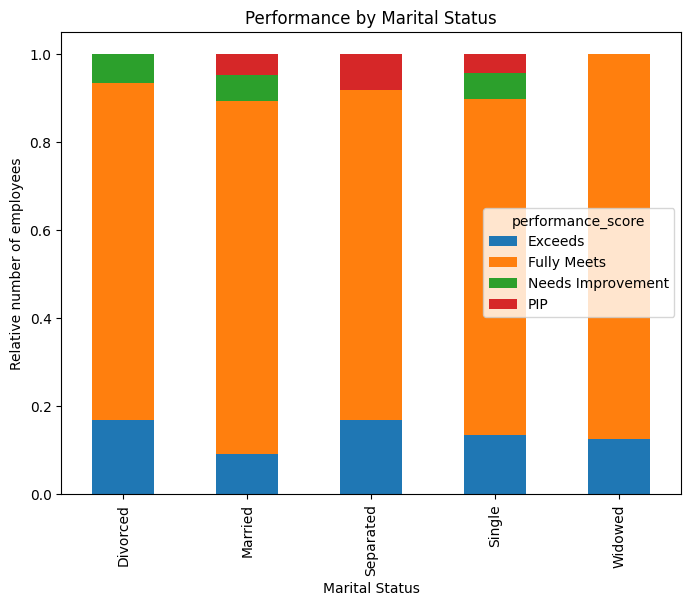

In [31]:
marital_status_performance = df.groupby('marital_desc')['performance_score'].value_counts(normalize=True).unstack().fillna(0)
marital_status_performance.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Performance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Relative number of employees')
plt.show()

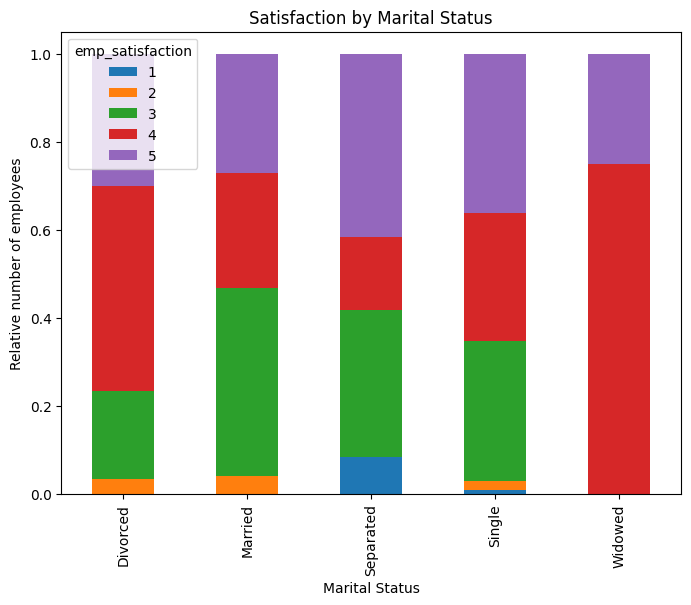

In [32]:
marital_status_performance = df.groupby('marital_desc')['emp_satisfaction'].value_counts(normalize=True).unstack().fillna(0)
marital_status_performance.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Satisfaction by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Relative number of employees')
plt.show()

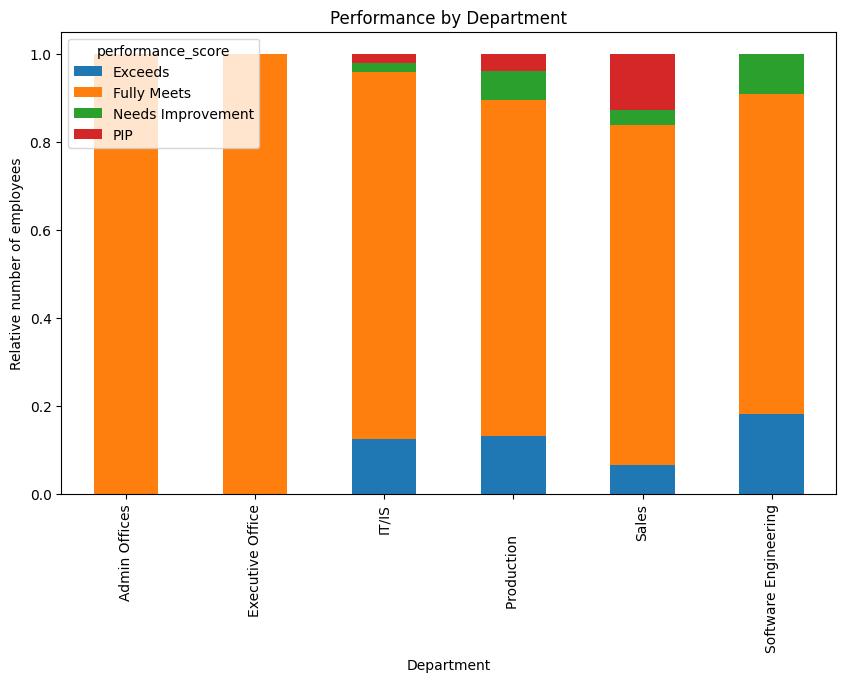

In [33]:
department_performance = df.groupby('department')['performance_score'].value_counts(normalize=True).unstack().fillna(0)
department_performance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Performance by Department')
plt.xlabel('Department')
plt.ylabel('Relative number of employees')
plt.show()

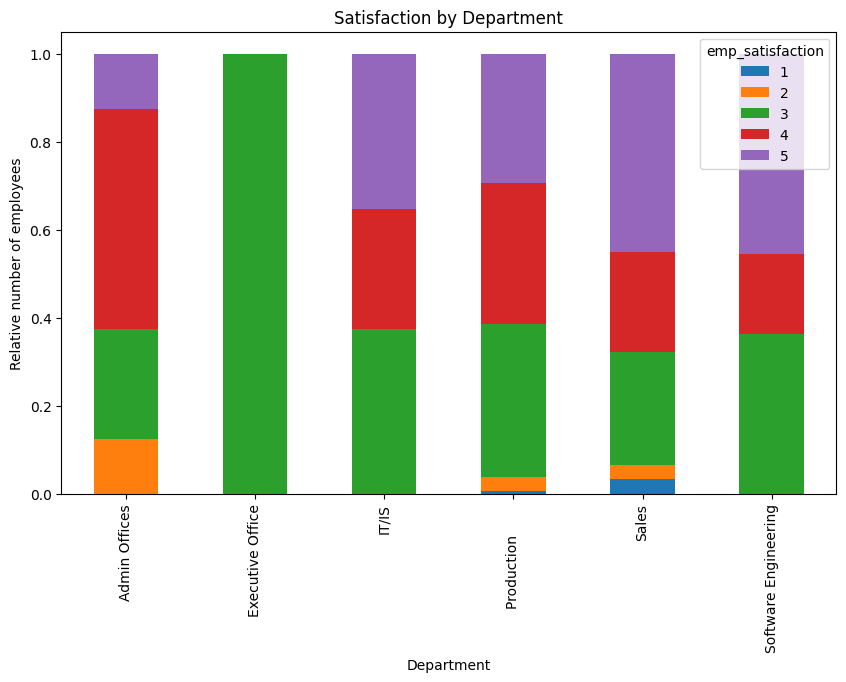

In [34]:
department_performance = df.groupby('department')['emp_satisfaction'].value_counts(normalize=True).unstack().fillna(0)
department_performance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Relative number of employees')
plt.show()

In [35]:
df['date_hire'] = pd.to_datetime(df['date_hire'])
df['date_termination'] = pd.to_datetime(df['date_termination'], errors='coerce')
voluntary_exit = df[df['employment_status'] == 'Voluntarily Terminated']
voluntary_exit['employment_duration'] = (voluntary_exit['date_termination'] - voluntary_exit['date_hire']).dt.days
average_duration = voluntary_exit['employment_duration'].mean()
median_duration = voluntary_exit['employment_duration'].median()
display(f"Average job duration: {average_duration} days")
display(f"Median job duration: {median_duration} days")

<ipython-input-35-fc2ba8802806>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voluntary_exit['employment_duration'] = (voluntary_exit['date_termination'] - voluntary_exit['date_hire']).dt.days


'Average job duration: 1272.090909090909 days'

'Median job duration: 1200.5 days'

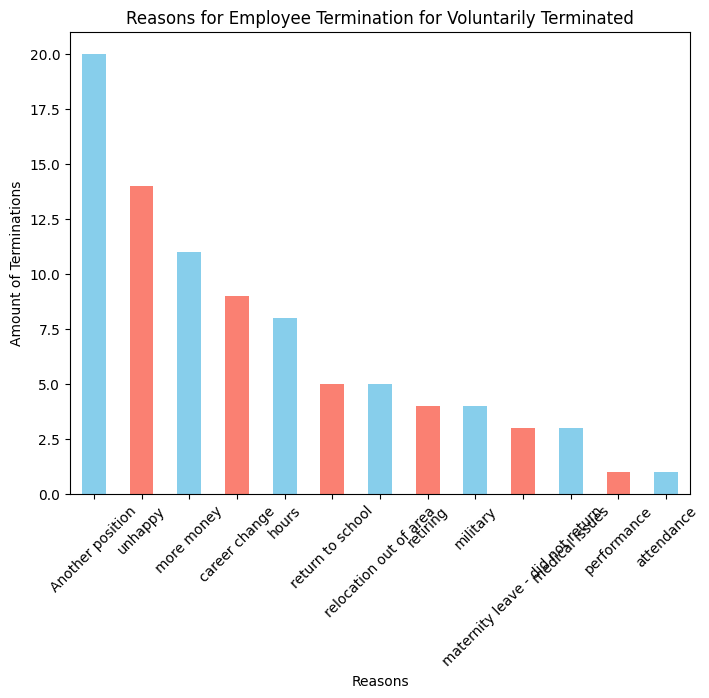

In [36]:
voluntary_exit = df[df['employment_status'] == 'Voluntarily Terminated']
involuntary_exit = df[df['employment_status'] == 'Terminated for Cause']
exit_reasons = voluntary_exit['term_reason'].value_counts()
plt.figure(figsize=(8, 6))
exit_reasons.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Reasons for Employee Termination for Voluntarily Terminated')
plt.xlabel('Reasons')
plt.ylabel('Amount of Terminations')
plt.xticks(rotation=45)
plt.show()

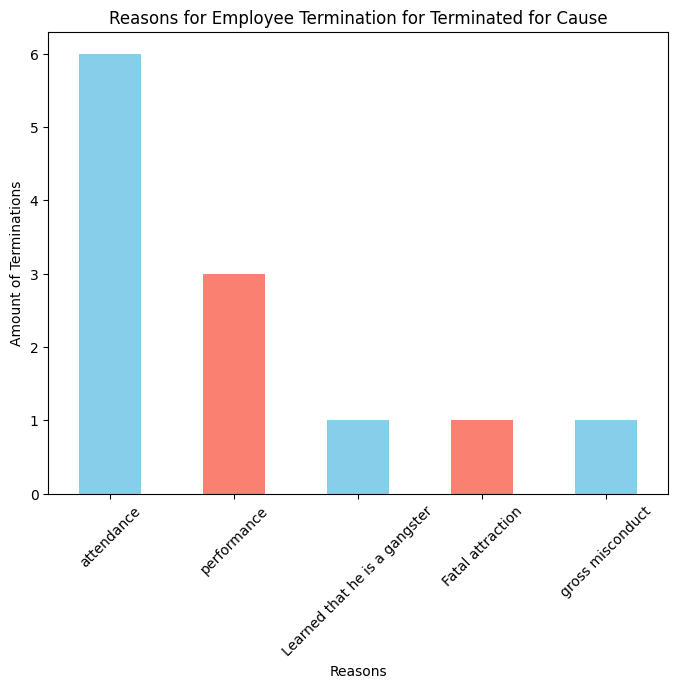

In [37]:
exit_reasons = involuntary_exit['term_reason'].value_counts()
plt.figure(figsize=(8, 6))
exit_reasons.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Reasons for Employee Termination for Terminated for Cause')
plt.xlabel('Reasons')
plt.ylabel('Amount of Terminations')
plt.xticks(rotation=45)
plt.show()

## Závěr

viz zaslaný word dokument